In [54]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
from tqdm import tqdm

In [ ]:
# Working temperature graph with USA dot come data


In [55]:
# # Base URL for the pages
# base_url = "http://www.usa.com/rank/us--average-temperature--county-rank.htm?hl=&hlst=&wist=&yr=&dis=&sb=DESC&plow=&phigh=&ps="

# # Function to parse a single page and extract data
# def parse_page(html_content):
#     soup = BeautifulSoup(html_content, 'html.parser')
#     rows = soup.find_all('tr')[2:]  # Skipping the header row
#     data = []
#     for row in rows:
#         cols = row.find_all('td')
#         if len(cols) == 3:  # Ensure there are three columns as expected
#             temp = cols[1].text.strip()
#             county_info = cols[2].text.split(' / ')[0]
#             county, state = county_info.rsplit(', ', 1)
#             data.append((county, state, temp))
#     return data

# # Collect data from multiple pages
# all_data = []
# for page_num in tqdm(range(1, 17)):  # From ps=1 to ps=16
#     response = requests.get(f"{base_url}{page_num}")
#     if response.status_code == 200:
#         page_data = parse_page(response.text)
#         all_data.extend(page_data)
#     else:
#         print(f"Failed to retrieve data from page {page_num}")

# # Creating DataFrame
# df_with_ah = pd.DataFrame(all_data, columns=['County', 'State', 'Average Temperature'])
# df_with_ah['Average Temperature'] = df_with_ah['Average Temperature'].str.replace('°F', '').astype(float)

# df_with_ah.to_csv('df_with_ah.csv', index=False)

In [56]:
df_with_ah = pd.read_csv("df_with_ah.csv")

In [57]:
print (df_with_ah.head(30))

          County State  Average Temperature
0     Miami-Dade    FL                75.60
1           Maui    HI                75.42
2        Broward    FL                75.00
3         Monroe    FL                74.96
4        Hidalgo    TX                74.60
5          Starr    TX                74.46
6     Palm Beach    FL                74.17
7            Lee    FL                74.06
8        Collier    FL                73.95
9        Cameron    TX                73.94
10       Willacy    TX                73.88
11        Hendry    FL                73.73
12        La Paz    AZ                73.65
13      Honolulu    HI                73.40
14         Kauai    HI                73.39
15        Zapata    TX                73.38
16          Yuma    AZ                73.38
17        Martin    FL                73.21
18      Imperial    CA                73.11
19      Sarasota    FL                73.08
20   Saint Lucie    FL                73.06
21       Manatee    FL          

In [58]:
# Remove Alaska, HI to focus on continental US

df = df_with_ah[~df_with_ah["State"].isin(["HI", "AK"])]

df.head(30)

,County,State,Average Temperature
0,Miami-Dade,FL,75.60
2,Broward,FL,75.00
3,Monroe,FL,74.96
4,Hidalgo,TX,74.60
5,Starr,TX,74.46
6,Palm Beach,FL,74.17
7,Lee,FL,74.06
8,Collier,FL,73.95
9,Cameron,TX,73.94
10,Willacy,TX,73.88


In [59]:
state_map = {
    "01": "AL", "02": "AK", "04": "AZ", "05": "AR", "06": "CA", "08": "CO", "09": "CT", "10": "DE", "11": "DC",
    "12": "FL", "13": "GA", "15": "HI", "16": "ID", "17": "IL", "18": "IN", "19": "IA", "20": "KS",
    "21": "KY", "22": "LA", "23": "ME", "24": "MD", "25": "MA", "26": "MI", "27": "MN", "28": "MS",
    "29": "MO", "30": "MT", "31": "NE", "32": "NV", "33": "NH", "34": "NJ", "35": "NM", "36": "NY",
    "37": "NC", "38": "ND", "39": "OH", "40": "OK", "41": "OR", "42": "PA", "44": "RI", "45": "SC",
    "46": "SD", "47": "TN", "48": "TX", "49": "UT", "50": "VT", "51": "VA", "53": "WA", "54": "WV",
    "55": "WI", "56": "WY", "72": "PR", "78": "VI"
}

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Load geospatial data
geoData = gpd.read_file(
    'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson'
)

geoData['State'] = geoData['STATE'].map(state_map)

# Exclude rows where STATE is '02' (Alaska) or '15' (Hawaii) or '35' (Puerto Rico)
# geoData = geoData[~geoData['STATE'].isin(['02', '15', '72'])]

# Function to standardize county names by making everything lowercase
def standardize_names(name):
    name = name.lower()
    name = name.replace("saint ", "st. ")
    name = name.replace("st ", "st. ")
    name = name.replace(" city", "")
    name = name.replace("de ", "de")
    name = name.replace("do\u00f1a ana", "dona ana")
    name = name.replace("la ", "la") # La Porte, La Salle, etc.
    name = name.replace("'", "")
    name = name.replace("sainte", "ste.")
    return name

# Apply the standardize_names function
df['County'] = df['County'].apply(standardize_names)

# Apply the standardize_names function to geoData
geoData['NAME'] = geoData['NAME'].apply(standardize_names)

C:\Users\Owner\AppData\Local\Temp\ipykernel_20876\3459981541.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['County'] = df['County'].apply(standardize_names)


In [61]:
unmatched_counties = df.loc[~df['County'].isin(geoData['NAME'])]
if len(unmatched_counties) > 0:
    print("Counties not found in DataFrame:", unmatched_counties['County'].unique())
else:
    print("All counties matched successfully.")

All counties matched successfully.


In [62]:
print (geoData.head())
print (df.head())

      id          GEO_ID STATE COUNTY      NAME    LSAD  CENSUSAREA  \
0  01001  0500000US01001    01    001   autauga  County     594.436   
1  01009  0500000US01009    01    009    blount  County     644.776   
2  01017  0500000US01017    01    017  chambers  County     596.531   
3  01021  0500000US01021    01    021   chilton  County     692.854   
4  01033  0500000US01033    01    033   colbert  County     592.619   

                                            geometry State  
0  POLYGON ((-86.49677 32.34444, -86.71790 32.402...    AL  
1  POLYGON ((-86.57780 33.76532, -86.75914 33.840...    AL  
2  POLYGON ((-85.18413 32.87053, -85.12342 32.772...    AL  
3  POLYGON ((-86.51734 33.02057, -86.51596 32.929...    AL  
4  POLYGON ((-88.13999 34.58170, -88.13925 34.587...    AL  
       County State  Average Temperature
0  miami-dade    FL                75.60
2     broward    FL                75.00
3      monroe    FL                74.96
4     hidalgo    TX                74.60
5 

In [63]:
# Check unique values of states and counties if necessary to find discrepancies
print(geoData['State'].unique())
print(df['State'].unique())

# Check for a specific state to see what's going wrong
print(geoData[geoData['State'] == 'VT'])  # Replace 'TX' with other state abbreviations as needed
print(df[df['State'] == 'VT'])  # Same her

['AL' 'AK' 'AR' 'CA' 'CO' 'FL' 'GA' 'CT' 'AZ' 'HI' 'ID' 'IL' 'IN' 'IA'
 'KS' 'KY' 'LA' 'MN' 'MS' 'ME' 'MD' 'MA' 'MI' 'MO' 'MT' 'NE' 'NV' 'NJ'
 'NM' 'NC' 'OH' 'OK' 'ND' 'NY' 'PA' 'SC' 'TN' 'SD' 'OR' 'TX' 'UT' 'VA'
 'WA' 'WI' 'WY' 'PR' 'WV' 'VT' 'DE' 'DC' 'NH' 'RI']
['FL' 'TX' 'AZ' 'CA' 'LA' 'GA' 'MS' 'AL' 'SC' 'NV' 'AR' 'NC' 'OK' 'NM'
 'TN' 'VA' 'MO' 'KY' 'MD' 'IL' 'KS' 'DE' 'IN' 'NJ' 'WV' 'DC' 'OH' 'OR'
 'CO' 'NY' 'UT' 'WA' 'PA' 'NE' 'IA' 'ID' 'CT' 'MA' 'RI' 'MI' 'SD' 'WI'
 'MT' 'WY' 'MN' 'VT' 'NH' 'ME' 'ND']
         id          GEO_ID STATE COUNTY        NAME    LSAD  CENSUSAREA  \
648   50005  0500000US50005    50    005   caledonia  County     648.864   
649   50019  0500000US50019    50    019     orleans  County     693.268   
1794  50003  0500000US50003    50    003  bennington  County     674.980   
1795  50007  0500000US50007    50    007  chittenden  County     536.578   
1796  50011  0500000US50011    50    011    franklin  County     633.706   
1797  50015  0500000US50015  

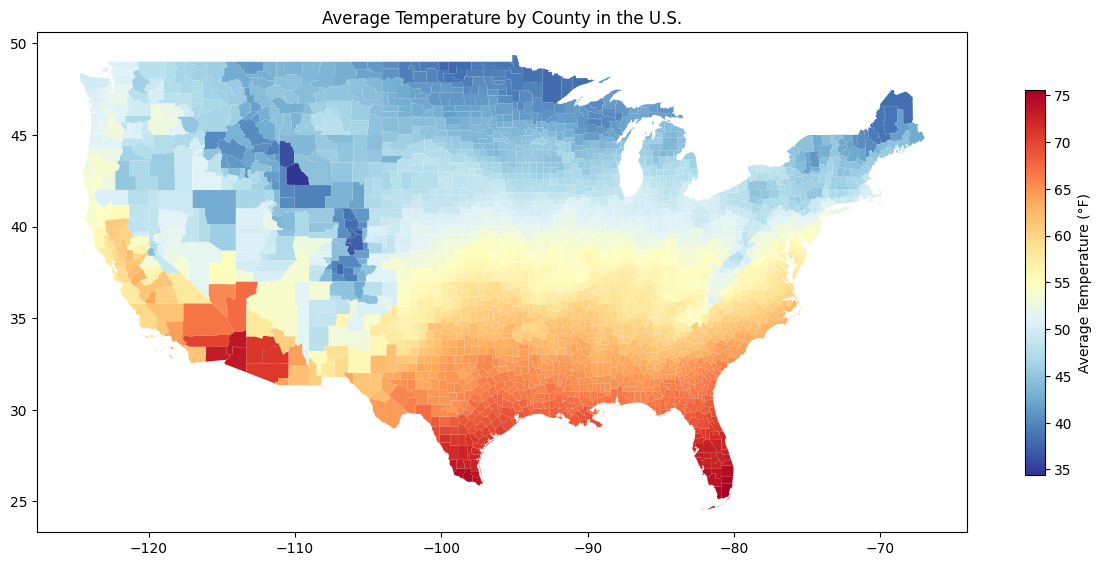

In [67]:
# Merge the DataFrame with the geospatial data
merged_data = geoData.merge(df, left_on=['NAME', 'State'], right_on=['County', 'State'], how='inner')


# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Determine the range of temperature values
vmin = merged_data['Average Temperature'].min()
vmax = merged_data['Average Temperature'].max()
norm = Normalize(vmin=vmin, vmax=vmax)

# Use a diverging colormap such as 'RdYlBu'
cmap = 'RdYlBu_r'  # Reversed so that blue represents cooler temperatures and red represents warmer temperatures

merged_data.plot(column='Average Temperature', ax=ax, cmap=cmap, norm=norm)

# Create a colorbar with the normalization
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.5)
cbar.set_label('Average Temperature (°F)')

plt.title('Average Temperature by County in the U.S.')
plt.show()

In [65]:
highest_latitude_county = merged_data.loc[merged_data['geometry'].centroid.y.idxmin()]
print("The county with the highest latitude is:", highest_latitude_county['NAME'], 
      "with a temperature of", highest_latitude_county['Average Temperature'], "°F")

The county with the highest latitude is: monroe with a temperature of 74.96 °F


C:\Users\Owner\AppData\Local\Temp\ipykernel_20876\1475610672.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  highest_latitude_county = merged_data.loc[merged_data['geometry'].centroid.y.idxmin()]


In [66]:
merged_data.to_csv('out.csv', index=False) 